Importing Libraries



In [ ]:
from IPython.display import display, Math, Latex

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Training Data

In [ ]:
def add_dummy_feature(x):
  '''
  Args:
    x: Training dataset

  Returns:
    Training dataset with an addition of dummy feature.

  '''

  return np.column_stack((np.ones(x.shape[0]), x))


#used to construct the data set.
def preprocessing(n=100):
  w1 = 3
  w0 = 4


  x = 10 * np.random.randn(n, )

  #used to obtain y = data point + nosie
  y = w0 + w1 * x + np.random.randn(n, )

  print('Shape of training data feature matrix:', x.shape)
  print('Shape of label vector', y.shape)

  from sklearn.model_selection import train_test_split

  x_train, x_test, y_train, y_test = train_test_split(
                  x, y, test_size=0.20, random_state=40
                  ) 

  
  

  print()
  print('shape of training feature matrix: ', x_train.shape)
  print('shape of label vector: ', y_train.shape)

  print('shape of test feature matrix: ', x_test.shape)
  print('shape of test label vector: ', y_test.shape)


  sns.set_style('white')
  f = plt.figure(figsize= (8, 8))

  plt.plot(x_train, y_train, 'b.')
  plt.title('Data Points')
  plt.grid(True)
  plt.xlabel('$x_1$', fontsize = 18)
  plt.ylabel('$y$', fontsize = 18)


  plt.show()

  x_test = add_dummy_feature(x_test)
  x_train = add_dummy_feature(x_train)
  return x_train, x_test, y_train, y_test

Linear Regression

In [ ]:
class LinReg(object):
  """
  y = X@w
  X: A feature matrix
  w : weight vector
  y: label vector

  """
  def __init__(self):
    self.t0 = 20
    self.t1 = 100000

  def predict(self,X:np.ndarray):
    y = X @ self.w
    return y
  
  def loss(self, X:np.ndarray, y:np.ndarray):
    e =  self.predict(X)-y
    return ((1/2)*(np.transpose(e) @ e))

  def rmse (self, X:np.ndarray, y:np.ndarray):
    return np.sqrt((2/X.shape[0]) * self.loss(X,y)) #2/n * loss
  
  def fit (self, X:np.ndarray, y:np.ndarray):
    self.w = np.linalg.pinv(X) @ y
    return self.w
  
  def calculate_gradient(self, X:np.ndarray, y:np.ndarray):
    return(np.transpose(X) @ (self.predict(X)-y))
  
  def update_weights(self, grad:np.ndarray, lr:float):
    return(self.w - lr*grad)

  def learning_schedule(self,t):
    return self.t0 / (t+self.t1)

  def gd(self, X:np.ndarray, y:np.ndarray, num_epochs:int, lr:float):
    self.w = np.zeros((X.shape[1]))
    self.w_all = []
    self.err_all = []
    for i in np.arange(0,num_epochs):
      self.w_all.append(self.w)
      self.err_all.append(self.loss(X,y))
      djdw = self.calculate_gradient(X,y)
      self.w = self.update_weights(djdw,lr)
    return self.w

  def mbgd(self, X:np.ndarray, y:np.ndarray, num_epochs:int, batch_size:int):
    self.w = np.zeros((X.shape[1]))
    self.w_all = []
    self.err_all = []
    mini_batch_id = 0

    for epoch in range(num_epochs):
      shuffled_indices = np.random.permutation(X.shape[0])
      X_shuffled = X[shuffled_indices]
      y_shuffled = y[shuffled_indices]
      for i in range(0,X.shape[0],batch_size):
        mini_batch_id += 1
        xi = X_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        self.w_all.append(self.w)
        self.err_all.append(self.loss(xi,yi))
        djdw = 2/batch_size * self.calculate_gradient(xi,yi)
        self.w = self.update_weights(djdw,self.learning_schedule(mini_batch_id))
    return self.w

  def sgd(self, X:np.ndarray, y:np.ndarray, num_epochs:int):
    self.w = np.zeros((X.shape[1]))
    self.w_all = []
    self.err_all = []
 
    for epoch in range(num_epochs):
      for i in range(X.shape[0]):
       
        random_index = np.random.randint(X.shape[0])
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        self.w_all.append(self.w)
        self.err_all.append(self.loss(xi,yi))
        djdw = 2 * self.calculate_gradient(xi,yi)
        self.w = self.update_weights(djdw,self.learning_schedule(epoch * X.shape[0] + i))
    return self.w

In [ ]:
import itertools
import functools

def get_combinations(x, degree):
  return itertools.combinations_with_replacement(x, degree)

def compute_new_features(items):
  return functools.reduce(lambda x, y: x * y, items)

In [ ]:
{items:compute_new_features(items) for items in get_combinations([1,2,3,4,5], 4)} 

{(1, 1, 1, 1): 1,
 (1, 1, 1, 2): 2,
 (1, 1, 1, 3): 3,
 (1, 1, 1, 4): 4,
 (1, 1, 1, 5): 5,
 (1, 1, 2, 2): 4,
 (1, 1, 2, 3): 6,
 (1, 1, 2, 4): 8,
 (1, 1, 2, 5): 10,
 (1, 1, 3, 3): 9,
 (1, 1, 3, 4): 12,
 (1, 1, 3, 5): 15,
 (1, 1, 4, 4): 16,
 (1, 1, 4, 5): 20,
 (1, 1, 5, 5): 25,
 (1, 2, 2, 2): 8,
 (1, 2, 2, 3): 12,
 (1, 2, 2, 4): 16,
 (1, 2, 2, 5): 20,
 (1, 2, 3, 3): 18,
 (1, 2, 3, 4): 24,
 (1, 2, 3, 5): 30,
 (1, 2, 4, 4): 32,
 (1, 2, 4, 5): 40,
 (1, 2, 5, 5): 50,
 (1, 3, 3, 3): 27,
 (1, 3, 3, 4): 36,
 (1, 3, 3, 5): 45,
 (1, 3, 4, 4): 48,
 (1, 3, 4, 5): 60,
 (1, 3, 5, 5): 75,
 (1, 4, 4, 4): 64,
 (1, 4, 4, 5): 80,
 (1, 4, 5, 5): 100,
 (1, 5, 5, 5): 125,
 (2, 2, 2, 2): 16,
 (2, 2, 2, 3): 24,
 (2, 2, 2, 4): 32,
 (2, 2, 2, 5): 40,
 (2, 2, 3, 3): 36,
 (2, 2, 3, 4): 48,
 (2, 2, 3, 5): 60,
 (2, 2, 4, 4): 64,
 (2, 2, 4, 5): 80,
 (2, 2, 5, 5): 100,
 (2, 3, 3, 3): 54,
 (2, 3, 3, 4): 72,
 (2, 3, 3, 5): 90,
 (2, 3, 4, 4): 96,
 (2, 3, 4, 5): 120,
 (2, 3, 5, 5): 150,
 (2, 4, 4, 4): 128,
 (2, 4, 4, 5): 1

In [ ]:
{items:compute_new_features(items) for items in get_combinations([2,3], 2)} 

{(2, 2): 4, (2, 3): 6, (3, 3): 9}

In [ ]:
def polynomial_transformation(x, degree, logging=False):

  if x.ndim == 1:
    x = x[:, None]

  x_t = x.transpose()
  features = [np.ones(len(x))]

  if logging:
    print('Input: ', x)

  for d in range(1, degree+1):
    for items in get_combinations(x_t, d):
      features.append(compute_new_features(items))
      if logging:
        print(items, ':', compute_new_features(items))
    
  if logging:
    print(np.asarray(features).transpose())

  return np.asarray(features).transpose()    

In [ ]:
polynomial_transformation(np.array([[1],[2],[3],[4],[5]]), degree=4, logging=True)

Input:  [[1]
 [2]
 [3]
 [4]
 [5]]
(array([1, 2, 3, 4, 5]),) : [1 2 3 4 5]
(array([1, 2, 3, 4, 5]), array([1, 2, 3, 4, 5])) : [ 1  4  9 16 25]
(array([1, 2, 3, 4, 5]), array([1, 2, 3, 4, 5]), array([1, 2, 3, 4, 5])) : [  1   8  27  64 125]
(array([1, 2, 3, 4, 5]), array([1, 2, 3, 4, 5]), array([1, 2, 3, 4, 5]), array([1, 2, 3, 4, 5])) : [  1  16  81 256 625]
[[  1.   1.   1.   1.   1.]
 [  1.   2.   4.   8.  16.]
 [  1.   3.   9.  27.  81.]
 [  1.   4.  16.  64. 256.]
 [  1.   5.  25. 125. 625.]]


array([[  1.,   1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.,  16.],
       [  1.,   3.,   9.,  27.,  81.],
       [  1.,   4.,  16.,  64., 256.],
       [  1.,   5.,  25., 125., 625.]])

Non Linear training Data Generation

In [ ]:
#Creates a training set where output label is obtained by first 
#calculating sin(2*pi*x) and then adding a small random noise having gaussian distribution

def create_nonlin_training_set(func, sample_size, std):
  x = np.linspace(0, 1, sample_size)
  y = func(x) + np.random.normal(scale=std, size=x.shape)
  return x, y

def nonlin(x):
  return np.sin(2*np.pi*x)

Data Visualization

In [ ]:
def visualize_training_data(X_train, Y_train):
  points = np.linspace(0, 1, 100)
  output = nonlin(points)

  plt.scatter(X_train, Y_train, label='Training Data')
  plt.plot(points, output, c='g', label='sin(2pi)')
  plt.legend()
  plt.show()

def visualize_model_fit(x, y, lin_reg, degree):
  points = np.linspace(0, 1, 100)
  output = nonlin(points)

  if degree > 0:
    plt.scatter(x, y, s=50, label='Training Data')

  plt.plot(points, output, c='g', label='sin2pi')

  y_hat = lin_reg.predict(polynomial_transformation(points, degree))
  plt.plot(points, y_hat, label='predicted')
  plt.legend()
  plt.show()

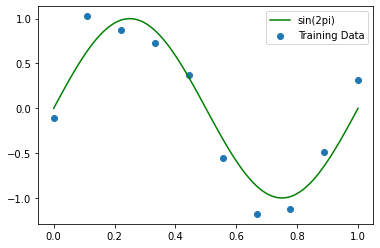

In [ ]:
x, y = create_nonlin_training_set(nonlin, 10, 0.2)
visualize_training_data(x, y)

In [ ]:
#Polynomial regression

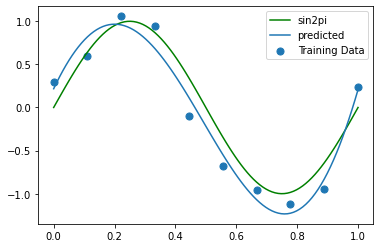

In [ ]:
degree = 7

x_transformation = polynomial_transformation(x, degree)
lin_reg = LinReg()
lin_reg.fit(x_transformation, y, 0.00001)
visualize_model_fit(x, y, lin_reg, degree)

###Ridge Regression

In [ ]:
class LinReg(object):
  """
  y = X@w
  X: A feature matrix
  w : weight vector
  y: label vector

  """
  def __init__(self):
    self.t0 = 20
    self.t1 = 100000

  def predict(self,X:np.ndarray):
    y = X @ self.w
    return y
  
  def loss(self, X:np.ndarray, y:np.ndarray, reg_rate:float):
    e =  self.predict(X)-y
    #return ((1/2)*(np.transpose(e) @ e))
    return ((1/2)*(np.transpose(e) @ e)) + (reg_rate/2)*(np.transpose(self.w) @ self.w)

  def rmse (self, X:np.ndarray, y:np.ndarray):
    return np.sqrt((2/X.shape[0]) * self.loss(X,y)) #2/n * loss
  
  def fit (self, X:np.ndarray, y:np.ndarray, reg_rate:float):
    
    self.w = np.zeros((X.shape[1]))
    eye = np.eye(np.size(X, 1))
    self.w = np.linalg.solve(
        reg_rate * eye + X.T @ X,
        X.T @ y
    )

    return self.w
  
  def calculate_gradient(self, X:np.ndarray, y:np.ndarray, reg_rate:float):
    return(np.transpose(X) @ (self.predict(X)-y) + reg_rate * self.w)
  
  def update_weights(self, grad:np.ndarray, lr:float):
    return(self.w - lr*grad)

  def learning_schedule(self,t):
    return self.t0 / (t+self.t1)

  def gd(self, X:np.ndarray, y:np.ndarray, num_epochs:int, lr:float):
    self.w = np.zeros((X.shape[1]))
    self.w_all = []
    self.err_all = []
    for i in np.arange(0,num_epochs):
      self.w_all.append(self.w)
      self.err_all.append(self.loss(X,y))
      djdw = self.calculate_gradient(X,y)
      self.w = self.update_weights(djdw,lr)
    return self.w

  def mbgd(self, X:np.ndarray, y:np.ndarray, num_epochs:int, batch_size:int):
    self.w = np.zeros((X.shape[1]))
    self.w_all = []
    self.err_all = []
    mini_batch_id = 0

    for epoch in range(num_epochs):
      shuffled_indices = np.random.permutation(X.shape[0])
      X_shuffled = X[shuffled_indices]
      y_shuffled = y[shuffled_indices]
      for i in range(0,X.shape[0],batch_size):
        mini_batch_id += 1
        xi = X_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        self.w_all.append(self.w)
        self.err_all.append(self.loss(xi,yi))
        djdw = 2/batch_size * self.calculate_gradient(xi,yi)
        self.w = self.update_weights(djdw,self.learning_schedule(mini_batch_id))
    return self.w

  def sgd(self, X:np.ndarray, y:np.ndarray, num_epochs:int):
    self.w = np.zeros((X.shape[1]))
    self.w_all = []
    self.err_all = []
 
    for epoch in range(num_epochs):
      for i in range(X.shape[0]):
       
        random_index = np.random.randint(X.shape[0])
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        self.w_all.append(self.w)
        self.err_all.append(self.loss(xi,yi))
        djdw = 2 * self.calculate_gradient(xi,yi)
        self.w = self.update_weights(djdw,self.learning_schedule(epoch * X.shape[0] + i))
    return self.w

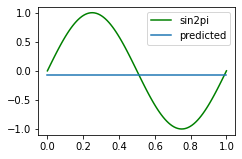

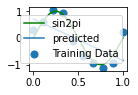

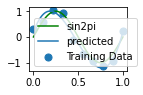

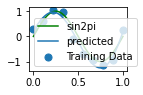

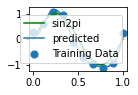

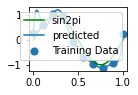

In [ ]:
f = plt.figure(figsize = (12, 8))
x, y = create_nonlin_training_set(nonlin, 10, 0.2)

for i, degree in enumerate([0, 1, 3, 5, 7, 9]):
  plt.subplot(3, 3, i+1)
  X_transform = polynomial_transformation(x, degree)
  lin_reg = LinReg()
  lin_reg.fit(X_transform, y, reg_rate=0)
  visualize_model_fit(x, y, lin_reg, degree)

#f.tight_layout()
plt.show()

In [ ]:
import numpy as np
import random
import itertools
import functools

def get_combinations(x, degree):
  return itertools.combinations_with_replacement(x, degree)

def compute_new_features(items):
  return functools.reduce(lambda x, y: x * y, items)

def polynomial_transformation(x, degree):

  if x.ndim == 1:
    x = x[:, None]

  x_t = x.transpose()
  features = [np.ones(len(x))]
  

  for d in range(1, degree+1):
    for items in get_combinations(x_t, d):
      features.append(compute_new_features(items))
  

  return np.asarray(features).transpose()   
  
def fit(x, y):
    return np.linalg.pinv(X) @ y
    
def predict(x, w):
    return x@w

def loss(x, w, y):
    e = predict(x, w) - y
    return ((1/2)*(np.transpose(e) @ e))

def rmse(x, w, y):
  
    return np.sqrt((2/x.shape[0]) * loss(x, w, y))

def model_error(X, y,degree):
    X = np.column_stack((np.ones(X.shape[0]), X))
    X_transformed = polynomial_transformation(X, degree)
    w = fit(X_transformed, y)
    error = rmse(X_transformed, w, y)
    print(error)
    

In [ ]:
def polynomial_transform(x, degree):
  if x.ndim == 1:
    x = x[:, None]

  x_t = x.transpose()
  features = [np.ones(len(x))]

  for d in range(1, degree+1):
    for items in get_combinations(x_t, d):
      features.append(compute_new_features(items))



  return np.asarray(features).transpose() 
    
def get_combinations(x, degree):
  return itertools.combinations_with_replacement(x, degree)

def compute_new_features(items):
  return functools.reduce(lambda x, y: x * y, items)


def ridge_loss(x, y, w):
    
    x = np.column_stack((np.ones(x.shape[0]), x))
    
    e = (x@w)-y
    return ((1/2)*(np.transpose(e)@e)